https://github.com/Tushar987/RecommenderSystem/blob/master/Recommender-System-Python.ipynb


In [62]:
from math import sqrt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Više izlaznih linija
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

ratings = pd.read_csv('ml-latest-small/ratings.csv',usecols=['userId','movieId','rating'])
ratings.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [63]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [64]:
ratings['rating'].describe(include='all')

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

rating
0.5    1066
1.0    1726
1.5    1386
2.0    3339
2.5    2925
3.0    4986
3.5    4216
4.0    5109
4.5    2710
5.0    2954
Name: movieId, dtype: int64

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

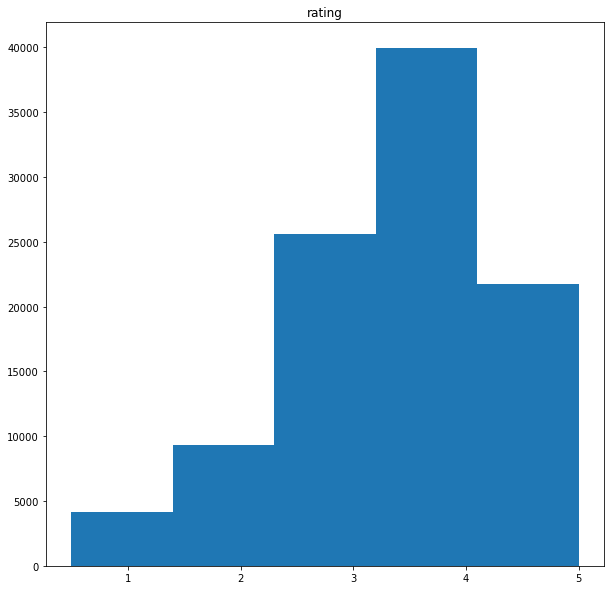

In [65]:
ratings.groupby('rating')['movieId'].nunique()

ratings.hist(column='rating',figsize=(10,10),bins=5,grid=False)

In [66]:
movies['movieId'].count()

9742

In [67]:
genre_filter = (movies['genres'] == '(no genres listed)')

movies = movies[~genre_filter]
movies=movies.reset_index(drop=True)

In [68]:
genres_count = {}
for row in range(movies['movieId'].count()):
    for genre in movies['genres'][row].split("|"):
        if genre!='':
            genres_count[genre]=genres_count.get(genre,0)+1

genres_count

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87}

<BarContainer object of 19 artists>

([<matplotlib.axis.YTick at 0x1b7a47ad220>,
 [Text(0, 0, 'Adventure'),
  Text(0, 1, 'Animation'),
  Text(0, 2, 'Children'),
  Text(0, 3, 'Comedy'),
  Text(0, 4, 'Fantasy'),
  Text(0, 5, 'Romance'),
  Text(0, 6, 'Drama'),
  Text(0, 7, 'Action'),
  Text(0, 8, 'Crime'),
  Text(0, 9, 'Thriller'),
  Text(0, 10, 'Horror'),
  Text(0, 11, 'Mystery'),
  Text(0, 12, 'Sci-Fi'),
  Text(0, 13, 'War'),
  Text(0, 14, 'Musical'),
  Text(0, 15, 'Documentary'),
  Text(0, 16, 'IMAX'),
  Text(0, 17, 'Western'),
  Text(0, 18, 'Film-Noir')])

Text(0.5, 0, 'Movie Count')

Text(0.5, 1.0, 'Genre Popularty')

Text(1283, 0.1, '1263')

Text(631, 1.1, '611')

Text(684, 2.1, '664')

Text(3776, 3.1, '3756')

Text(799, 4.1, '779')

Text(1616, 5.1, '1596')

Text(4381, 6.1, '4361')

Text(1848, 7.1, '1828')

Text(1219, 8.1, '1199')

Text(1914, 9.1, '1894')

Text(998, 10.1, '978')

Text(593, 11.1, '573')

Text(1000, 12.1, '980')

Text(402, 13.1, '382')

Text(354, 14.1, '334')

Text(460, 15.1, '440')

Text(178, 16.1, '158')

Text(187, 17.1, '167')

Text(107, 18.1, '87')

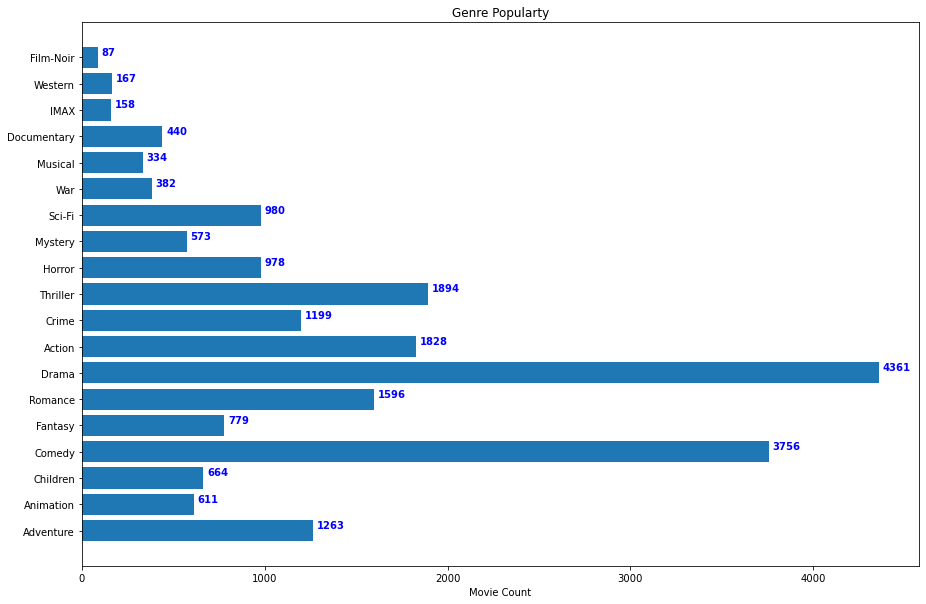

In [69]:
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(range(len(genres_count)),genres_count.values())
plt.yticks(range(len(genres_count)),list(genres_count.keys()))
plt.xlabel('Movie Count')
plt.title("Genre Popularty")
for i, v in enumerate(genres_count.values()):
    ax.text(v + 20, i + .10, v, color='blue', fontweight='bold')

In [70]:
def euclidean_distance(person1,person2):
    df_first = ratings.loc[ratings['userId']==person1]
    df_second = ratings.loc[ratings['userId']==person2]

    df = pd.merge(df_first,df_second,how='inner',on='movieId')

    if len(df)==0:return 0

    sum_of_squares = sum(pow((df['rating_x']-df['rating_y']),2))
    return 1/(1+sum_of_squares)

euclidean_distance(1,1)

1.0

In [71]:
def pearson_score(person1,person2):

    #Get detail for Person1 and Person2
    df_first= ratings.loc[ratings.userId==person1]
    df_second= ratings.loc[ratings.userId==person2]

    # Getting mutually rated items
    df= pd.merge(df_first,df_second,how='inner',on='movieId')

    # If no rating in common
    n=len(df)
    if n==0: return 0

    #Adding up all the ratings
    sum1=sum(df['rating_x'])
    sum2=sum(df['rating_y'])

    ##Summing up squares of ratings
    sum1_square= sum(pow(df['rating_x'],2))
    sum2_square= sum(pow(df['rating_y'],2))

    # sum of products
    product_sum= sum(df['rating_x']*df['rating_y'])

    ## Calculating Pearson Score
    numerator= product_sum - (sum1*sum2/n)
    denominator=sqrt((sum1_square- pow(sum1,2)/n) * (sum2_square - pow(sum2,2)/n))
    if denominator==0: return 0

    r=numerator/denominator

    return r

pearson_score(1,550)

1.000000000000016

In [72]:
def findOthers(personId):
    myset = set()
    for otherPerson in ratings.loc[ratings['userId']!=personId]['userId']:
        myset.add(otherPerson)

    return myset

In [73]:
def topMatches(personId,n=5,similarity=pearson_score):
    scores=[(similarity(personId,other),other) for other in findOthers(personId)]
    # Sort the list so the highest scores appear at the top
    scores.sort( )
    scores.reverse( )
    return scores[0:n]

topMatches(1)

[(1.000000000000016, 550), (1.0, 598), (1.0, 333), (1.0, 146), (1.0, 106)]

In [74]:
def getRecomendation(personId, similarity=pearson_score):

    """
    totals: Dictionary containing sum of product of Movie Ratings by other user multiplied by weight(similarity)
    simSums: Dictionary containung sum of weights for all the users who have rated that particular movie.
    """

    totals,simSums = {},{}

    df_person = ratings.loc[ratings.userId==personId]

    for otherId in findOthers(personId):
        sim = similarity(personId,otherId)
        if sim<=0 : continue

        df_other = ratings.loc[ratings.userId == otherId]

        # Oni filmovi koje user nije personId nije pogledao
        movie = df_other[~df_other.isin(df_person).all(1)]

        for (movieid,rating) in (np.array(movie[['movieId','rating']])):
            totals.setdefault(movieid,0)
            totals[movieid]+=rating*sim

            simSums.setdefault(movieid,0)
            simSums[movieid]+=sim

        ranking = [(t/simSums[item],item) for item,t in totals.items()]

        ranking.sort()
        ranking.reverse()

        recomendedId = np.array([x[1] for x in ranking])

        return np.array(movies[movies['movieId'].isin(recomendedId)]['title'])[:20]

In [75]:
getRecomendation(1)


array(['Dangerous Minds (1995)', "Schindler's List (1993)",
       'Courage Under Fire (1996)', 'Operation Dumbo Drop (1995)',
       'Wallace & Gromit: The Best of Aardman Animation (1996)',
       'Escape from L.A. (1996)', 'My Fair Lady (1964)',
       'Doors, The (1991)', 'On Golden Pond (1981)',
       'Deer Hunter, The (1978)', 'Patton (1970)', 'Highlander (1986)',
       'Field of Dreams (1989)', 'Star Trek: The Motion Picture (1979)',
       'Conan the Barbarian (1982)', 'Bambi (1942)',
       'Lady and the Tramp (1955)', 'Rescuers, The (1977)', 'Tron (1982)',
       'Thing, The (1982)'], dtype=object)

In [76]:
getRecomendation(100)


array(['Toy Story (1995)', 'Grumpier Old Men (1995)', 'Heat (1995)',
       'Seven (a.k.a. Se7en) (1995)', 'Usual Suspects, The (1995)',
       'From Dusk Till Dawn (1996)', 'Bottle Rocket (1996)',
       'Braveheart (1995)', 'Rob Roy (1995)', 'Canadian Bacon (1995)',
       'Desperado (1995)', 'Billy Madison (1995)', 'Clerks (1994)',
       'Dumb & Dumber (Dumb and Dumber) (1994)', 'Ed Wood (1994)',
       'Star Wars: Episode IV - A New Hope (1977)', 'Pulp Fiction (1994)',
       'Stargate (1994)', 'Tommy Boy (1995)',
       'Clear and Present Danger (1994)'], dtype=object)